<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN Classification*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [3]:
df = pd.read_csv(breast_cancer_csv, index_col = 'id')

In [4]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  

[5 rows x 32 columns]

In [5]:
df = df.drop(columns = 'Unnamed: 32')

In [6]:
df.shape

(569, 31)

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

<Figure size 1440x864 with 0 Axes>

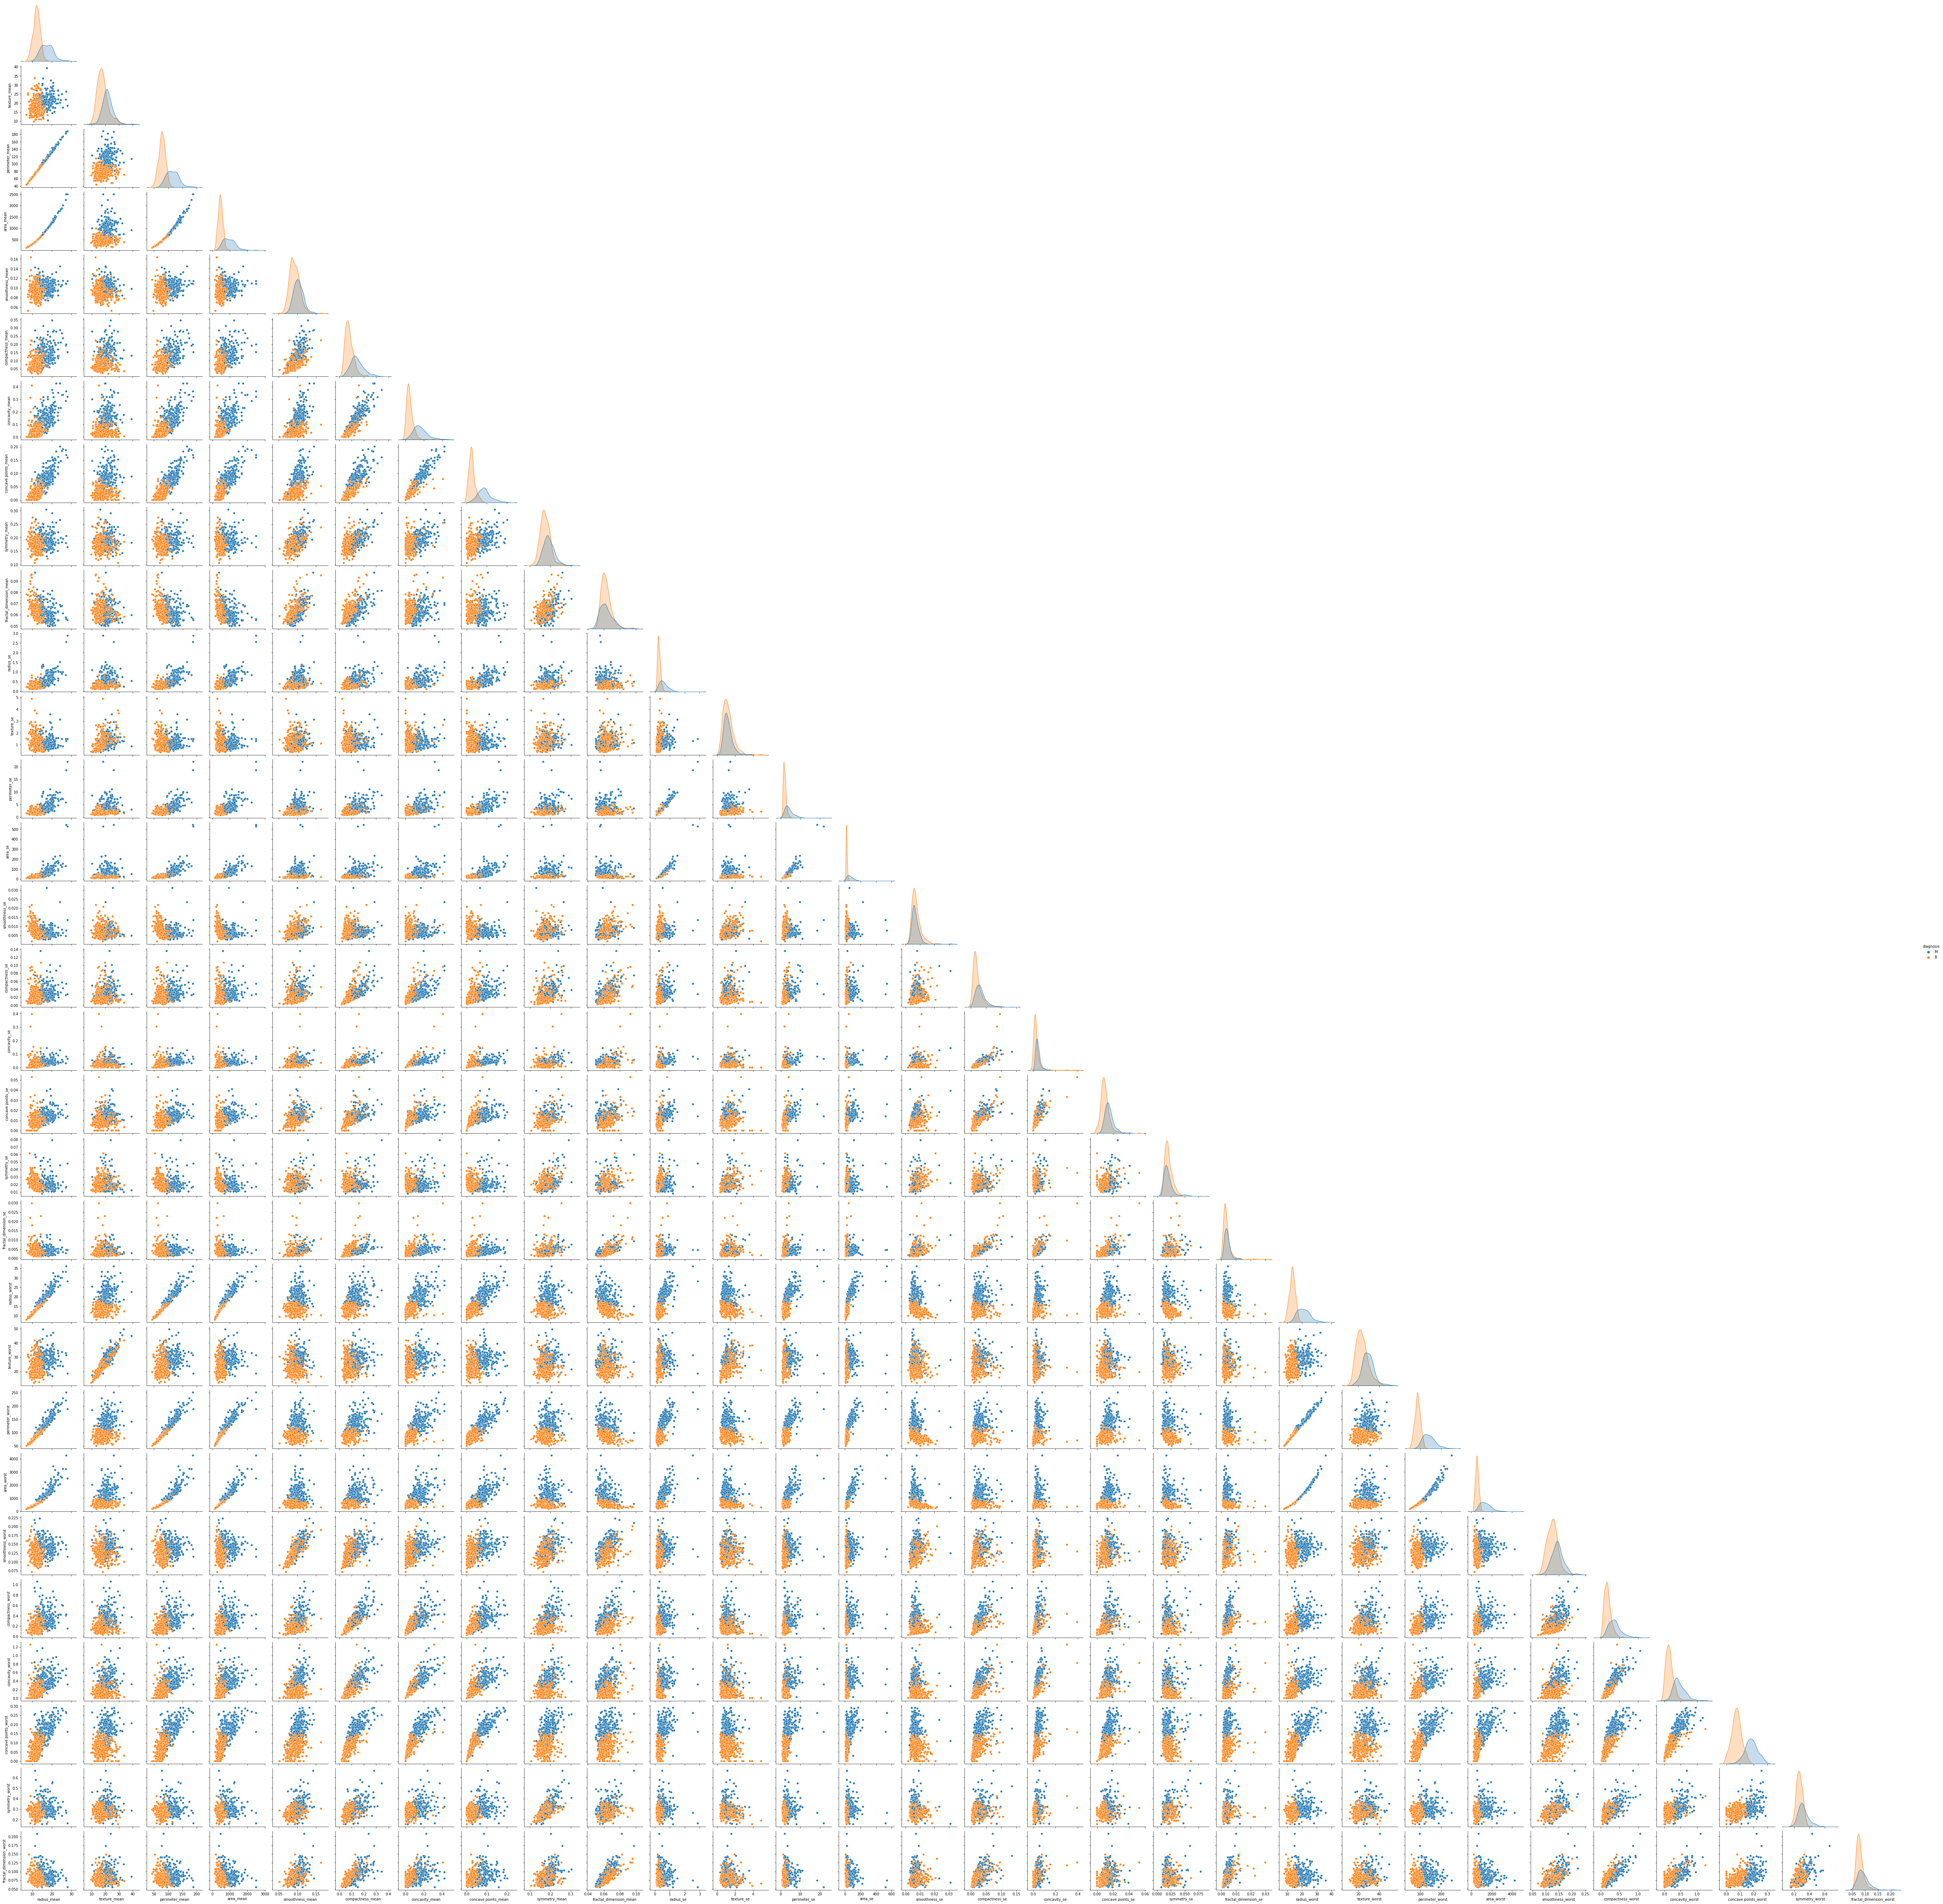

In [7]:
plt.figure(figsize = (20,12))
sns.pairplot(df, hue = 'diagnosis', data = df, corner = True)
plt.show()

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [8]:
# ANSWER
X = df.drop(columns = 'diagnosis')
y = df['diagnosis']

In [9]:
#Converting to Dummy: Malignant: 1, Benign: 0
y = df['diagnosis'].replace({'M':1,'B':0})

In [10]:
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

### 4. What is the baseline accuracy?

In [11]:
# ANSWER - Standard accuracy score

#Use dummy classifier to set baseline accuracy
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X,y)
baseline_acc = dummy.score(X,y)

print(baseline_acc)

0.6274165202108963


### 5. Choose features to be your predictor variables and set up your X.

In [12]:
# ANSWER

#As Above

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [13]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors = 1)

# fit on the unstandardized data:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [14]:
# ANSWER
# predict the response values for the observations in X ("test the model")
y_pred = knn.predict(X)
y_pred_proba = knn.predict_proba(X)

# store the predicted response values
unsupervisedknn1_acc = knn.score(X,y)
print(unsupervisedknn1_acc)

1.0


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [15]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
# STEP 2: train the model on the training set (using K=1)
train_knn_1 = KNeighborsClassifier(n_neighbors = 1)
train_knn_1.fit(X_train,y_train)
# STEP 3: test the model on the testing set, and check the accuracy
train_knn_1_acc = train_knn_1.score(X_test,y_test)
print(train_knn_1_acc)

0.9210526315789473


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [16]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
K = len(X_train)
# Fit Train Data
knn_455 = KNeighborsClassifier(n_neighbors = K)
knn_455.fit(X_train,y_train)
# Print accuracy_score
knn_455_acc = knn_455.score(X_test,y_test)
print(knn_455_acc)

0.631578947368421


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

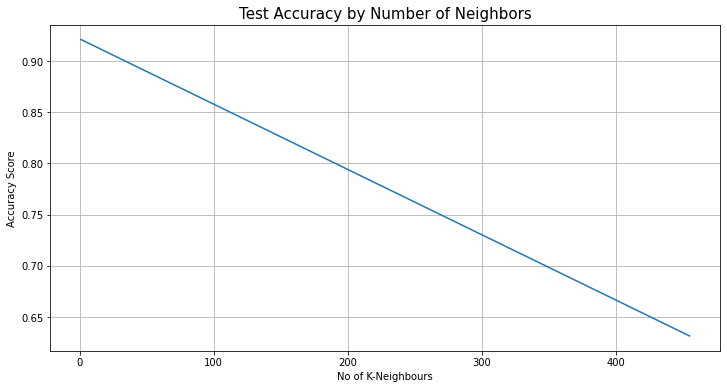

In [17]:
# ANSWER
# plot test accuracy by number of neighbors:
kneighbours = [1,K]
acc_score = [train_knn_1_acc,knn_455_acc]

plt.figure(figsize = (12,6))
plt.grid(True)
plt.title('Test Accuracy by Number of Neighbors', fontsize = 15)
plt.plot(kneighbours,acc_score)
plt.xlabel('No of K-Neighbours')
plt.ylabel('Accuracy Score')
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [18]:
# ANSWER
K5 = list(range(1,30))
unstandardized_acc = []
for k in K5:
    list_knn = KNeighborsClassifier(n_neighbors = k)
    list_knn.fit(X_train,y_train)
    unstandardized_acc.append(list_knn.score(X_test,y_test))

In [19]:
unstandardized_metric_df = pd.DataFrame(list(zip(K5,unstandardized_acc)),columns = ['No of K','Unstandardized Accuracy Score'])

unstandardized_metric_df

No of K  Unstandardized Accuracy Score
0         1                       0.921053
1         2                       0.885965
2         3                       0.921053
3         4                       0.938596
4         5                       0.938596
5         6                       0.921053
6         7                       0.938596
7         8                       0.929825
8         9                       0.929825
9        10                       0.921053
10       11                       0.929825
11       12                       0.921053
12       13                       0.921053
13       14                       0.921053
14       15                       0.921053
15       16                       0.912281
16       17                       0.912281
17       18                       0.912281
18       19                       0.912281
19       20                       0.912281
20       21                       0.912281
21       22                       0.903509
22       23                       0.903509
23       24                       0.903509
24       25                       0.903509
25       26                       0.903509
26       27                       0.903509
27       28                       0.903509
28       29                       0.903509

In [20]:
print('The mean cross-validated accuracy for unstandardized dataset with 5 folds is {}'.format(unstandardized_metric_df['Unstandardized Accuracy Score'].mean()))

The mean cross-validated accuracy for unstandardized dataset with 5 folds is 0.9159104658197219


### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [21]:
# ANSWER
# Standarize X
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

standardized_acc =[]

for k in K5:
    standard_knn = KNeighborsClassifier(n_neighbors = k)
    standard_knn.fit(X_train,y_train)
    standardized_acc.append(standard_knn.score(X_test,y_test))
    
standardized_metric_df = pd.DataFrame(list(zip(K5, standardized_acc)), columns = ['No of K', 'Standardized Accuracy Score'])

standardized_metric_df

No of K  Standardized Accuracy Score
0         1                     0.938596
1         2                     0.938596
2         3                     0.947368
3         4                     0.947368
4         5                     0.956140
5         6                     0.956140
6         7                     0.956140
7         8                     0.956140
8         9                     0.956140
9        10                     0.956140
10       11                     0.956140
11       12                     0.956140
12       13                     0.947368
13       14                     0.947368
14       15                     0.956140
15       16                     0.956140
16       17                     0.947368
17       18                     0.956140
18       19                     0.956140
19       20                     0.947368
20       21                     0.956140
21       22                     0.956140
22       23                     0.956140
23       24                     0.956140
24       25                     0.956140
25       26                     0.956140
26       27                     0.956140
27       28                     0.956140
28       29                     0.956140

In [22]:
print('The mean cross-validated accuracy for standardized dataset with 5 folds is {}'.format(standardized_metric_df['Standardized Accuracy Score'].mean()))

The mean cross-validated accuracy for standardized dataset with 5 folds is 0.953115547489413


Text(0.5, 1.0, 'Standardized Test Accuracy Score by No of Neighbors')

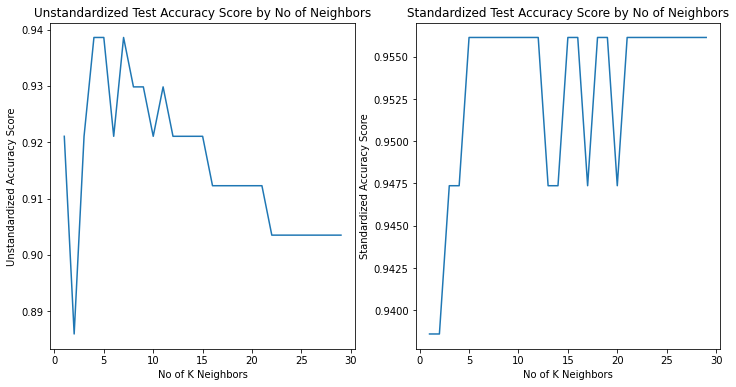

In [23]:
# ANSWER
# plot test accuracy by number of neighbors:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(121)
ax.plot(unstandardized_metric_df['No of K'],unstandardized_metric_df['Unstandardized Accuracy Score'])
plt.xlabel('No of K Neighbors')
plt.ylabel('Unstandardized Accuracy Score')
plt.title('Unstandardized Test Accuracy Score by No of Neighbors')

ax =fig.add_subplot(122)
ax.plot(standardized_metric_df['No of K'],standardized_metric_df['Standardized Accuracy Score'])
plt.xlabel('No of K Neighbors')
plt.ylabel('Standardized Accuracy Score')
plt.title('Standardized Test Accuracy Score by No of Neighbors')


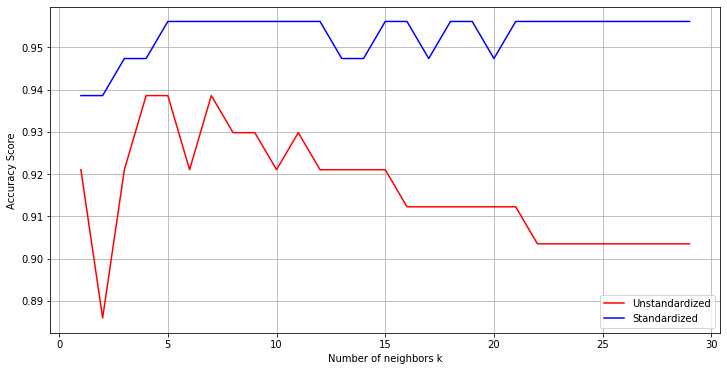

In [27]:
plt.figure(figsize = (12,6))
plt.grid(True)
plt.plot(unstandardized_metric_df['No of K'],unstandardized_metric_df['Unstandardized Accuracy Score'], color = 'red',label = 'Unstandardized')
plt.plot(standardized_metric_df['No of K'],standardized_metric_df['Standardized Accuracy Score'], color = 'blue',label = 'Standardized')
plt.xlabel(r'Number of neighbors k')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [24]:
unstandardized_metric_df['Standardized Accuracy Score'] = standardized_acc

metric_df = unstandardized_metric_df

In [25]:
metric_df

No of K  Unstandardized Accuracy Score  Standardized Accuracy Score
0         1                       0.921053                     0.938596
1         2                       0.885965                     0.938596
2         3                       0.921053                     0.947368
3         4                       0.938596                     0.947368
4         5                       0.938596                     0.956140
5         6                       0.921053                     0.956140
6         7                       0.938596                     0.956140
7         8                       0.929825                     0.956140
8         9                       0.929825                     0.956140
9        10                       0.921053                     0.956140
10       11                       0.929825                     0.956140
11       12                       0.921053                     0.956140
12       13                       0.921053                     0.947368
13       14                       0.921053                     0.947368
14       15                       0.921053                     0.956140
15       16                       0.912281                     0.956140
16       17                       0.912281                     0.947368
17       18                       0.912281                     0.956140
18       19                       0.912281                     0.956140
19       20                       0.912281                     0.947368
20       21                       0.912281                     0.956140
21       22                       0.903509                     0.956140
22       23                       0.903509                     0.956140
23       24                       0.903509                     0.956140
24       25                       0.903509                     0.956140
25       26                       0.903509                     0.956140
26       27                       0.903509                     0.956140
27       28                       0.903509                     0.956140
28       29                       0.903509                     0.956140

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



